## Setup the Notebook

In [152]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A Func. to Read in our CSV file

In [153]:
def csv_to_features(path) -> tuple((list, list)):
    # read the data from the csv file
    data = pd.read_csv('bonded_ratio.csv')

    # split the csv into symbols and bonded ratios (ind./dep. variables)
    sym, rat = [], []
    for row in data.values:
        sym.append(row[0])
        rat.append(row[1])

    return sym, rat

## A Func. to Plot the Data

In [154]:
def plot_bonded_ratios(sym, rat):
    # create our figure and subplots
    fig, axs = plt.subplots(2,2)

    # construct a series plot in the top-left of the figure
    axs[0][0].plot(sym, rat, color='blue', linewidth=2, markersize=12)
    # set appropriate axes labels
    axs[0][0].set_xlabel('Symbol')
    axs[0][0].set_ylabel('Bonded Ratio')

    # construct a pie-chart in the top-right of the figure
    axs[0][1].pie(rat, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), labels=sym, autopct='%1.1f%%',
                    shadow=True, startangle=0)
    # set equal scaling
    axs[0][1].axis('equal')
    axs[0][1].set_title('Bonded ratios as a percentage of the Cosmos (Which coin is the most bonded?)')

    # construct a bar chart in the bottom-left of the figure
    y_pos = np.arange(len(sym))
    axs[1][0].bar(y_pos, rat, width=0.50, color='green', align='center', alpha=0.5)
    # spread out the ticks so they are readable
    axs[1][0].set_xticks(y_pos)
    # set each tick to the symbol of the coin
    axs[1][0].set_xticklabels(sym)
    # set appropriate axes labels and title
    axs[1][0].set_title('Percentage of Bonded Tokens as a Ratio of Circulating Supply')
    axs[1][0].set_xlabel('Symbol')
    axs[1][0].set_ylabel('Bonded Ratio')

    # construct a step chart of the mean of the bonded ratios in the bottom-right of the figure
    # add the markers in the middle, they are more readable that way
    axs[1][1].step(sym, rat, color='orange', where='mid', marker='o', linestyle='dashed', linewidth=2, markersize=12)
    # add the mean line to the chart
    axs[1][1].axhline(np.mean(rat), color='red', linewidth=2)
    # give the chart a legend and set appropriate axes labels
    axs[1][1].legend(['Data', 'Mean'], loc='lower right')
    axs[1][1].set_xlabel('Symbol')
    axs[1][1].set_ylabel('Bonded Ratio')

    # make the figure larger and higher res
    fig.set_size_inches(20,10)
    plt.figure(dpi=300)
    # title the figure as a whole
    fig.suptitle('Bonded Ratios of the Cosmos', fontsize=20)
    
    # show the figure
    plt.show()

## A Func. For Performing Simple Analysis

In [155]:
def analyze(sym, rat):
    # find the idx of the symbols we are analyzing
    max_idx = np.argmax(rat)    # token with the highest bonded ratio
    min_idx = np.argmin(rat)    # token with the lowest bonded ratio
    # find the mean/median of the bonded ratios
    mean = np.mean(rat)
    median = np.median(rat)

    # print the results
    print('(MAX) The most bonded coin is {} with a bonded ratio of {:.2f}%'.format(sym[max_idx], rat[max_idx]))
    print('(MIN) The least bonded coin is {} with a bonded ratio of {:.2f}%'.format(sym[min_idx], rat[min_idx]))
    print('(MEAN) The mean bonded ratio is {:.2f}%'.format(mean))
    print('(MEDIAN) The median bonded ratio is {:.2f}%'.format(median))

## Driver Code: Read and Plot Metrics

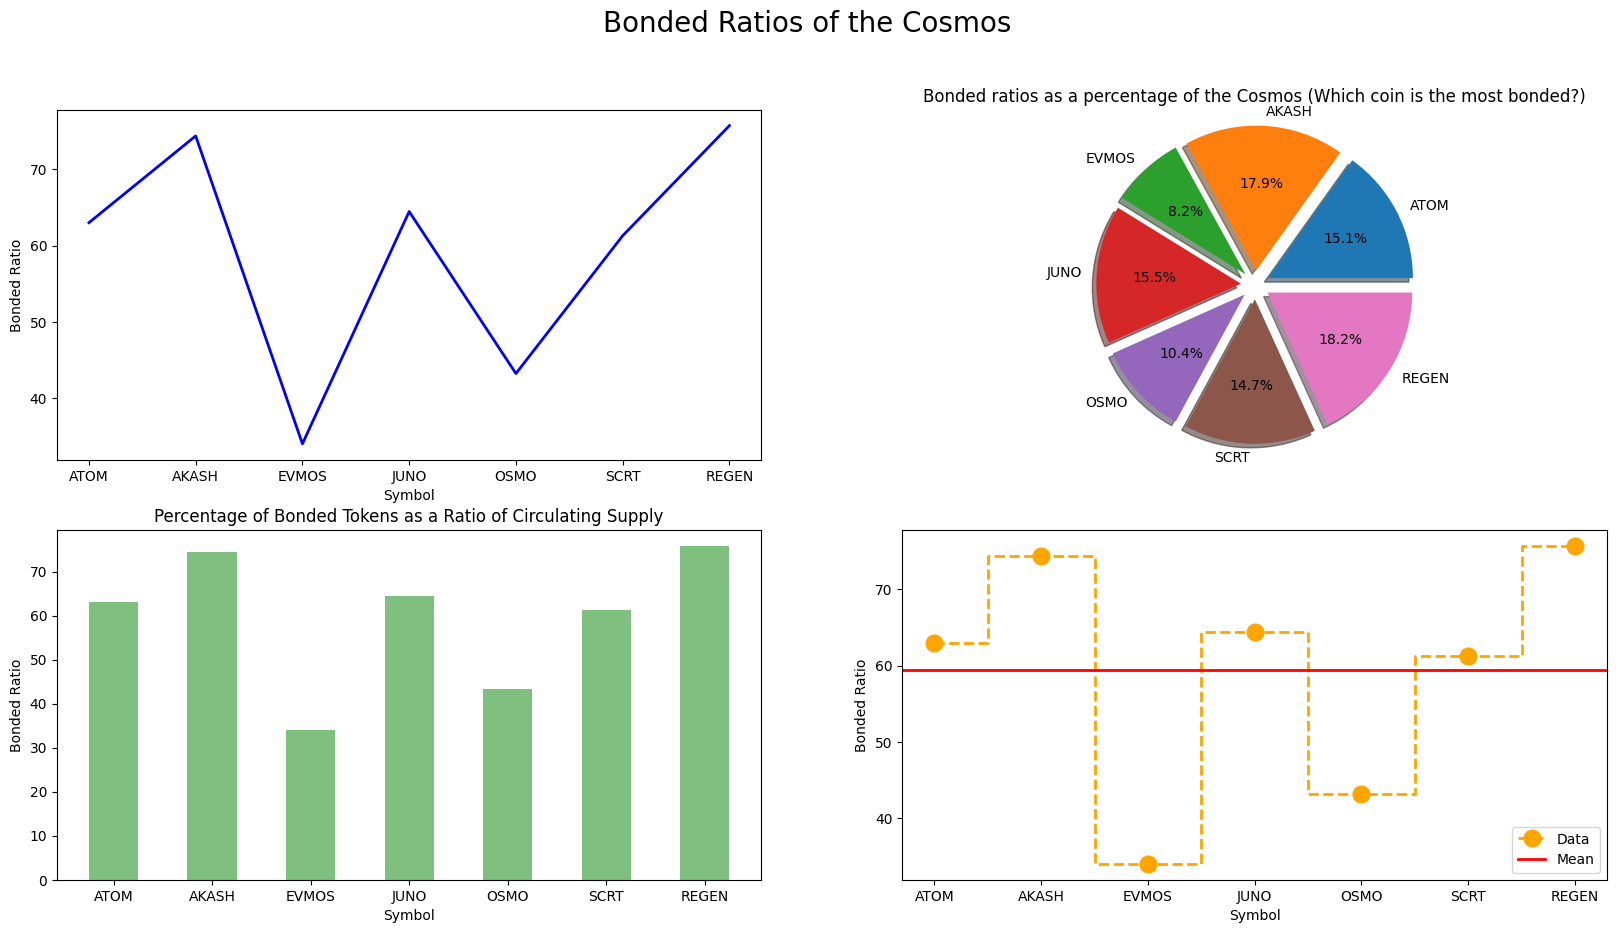

<Figure size 1920x1440 with 0 Axes>

(MAX) The most bonded coin is REGEN with a bonded ratio of 75.71%
(MIN) The least bonded coin is EVMOS with a bonded ratio of 34.01%
(MEAN) The mean bonded ratio is 59.43%
(MEDIAN) The median bonded ratio is 62.99%


In [156]:
# our ind./dep. variables
sym, rat = csv_to_features('bonded_ratio.csv')

# plot the bonded ratios
plot_bonded_ratios(sym, rat)

# analyze the bonded ratios
analyze(sym, rat)